In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize, PunktSentenceTokenizer, RegexpTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords, state_union
from nltk.wsd import lesk
from nltk.tag import UnigramTagger, BigramTagger, BrillTagger
from nltk.chunk import ne_chunk

In [2]:
matches = pd.read_csv('/home/user/Downloads/IPLChatbot/matches.csv')
deliveries = pd.read_csv('/home/user/Downloads/IPLChatbot/deliveries.csv')

## Runs

In [3]:
##  Runs scored by Batsman B1 in Match X
def runs_batsman_match(batsman_name, match_id):
    x = deliveries.groupby(['match_id', 'batsman'])['batsman_runs'].sum()
    runs = x[match_id][batsman_name]
    return runs 

In [4]:
## Total Runs scored in Match X by team Y
def total_runs_team_match(team, match_id):
    x = deliveries.groupby(['match_id','batting_team'])['total_runs'].sum()
    total_runs_match = x[match_id][team]
    return total_runs_match  

In [5]:
## Max scorer in match X
def max_score_batsman_match(match_id):
    x = deliveries.groupby(['match_id', 'batsman'])['batsman_runs'].sum()
    name = x[match_id].idxmax()
    runs = x[match_id].max()
    return [name, runs]  

In [6]:
## Min scorer in match X
def min_score_batsman_match(match_id):
    x = deliveries.groupby(['match_id', 'batsman'])['batsman_runs'].sum()
    name = x[match_id].idxmin()
    runs = x[match_id].min()
    return [name, runs]  

In [7]:
## Maxscorer in match X in Team Y
def max_score_batsman_match_inTeam(match_id, team):
    x = deliveries.groupby(['match_id','batting_team', 'batsman'])['batsman_runs'].sum()
    name = x[match_id][team].idxmax()
    runs = x[match_id][team].max()
    return [name, runs]  

In [8]:
## Min scorer in match X in Team Y
def min_score_batsman_match_inTeam(match_id, team):
    x = deliveries.groupby(['match_id','batting_team', 'batsman'])['batsman_runs'].sum()
    name = x[match_id][team].idxmin()
    runs = x[match_id][team].min()
    return [name, runs]  

In [9]:
## ith highest scorer 
def highest_scorer(i):
    #player_runs = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending =False)
    player_name = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending =False).iloc[i:i+1]
    return  player_name

In [10]:
## batsman total run
def total_runs_batsman_IPL(batsman):
    x = deliveries.groupby(['batsman'])['batsman_runs'].sum()
    runs_batsman = x[batsman]
    return runs_batsman

In [11]:
#Total runsmade by a team
def total_runs_team_IPL(team):
    x = deliveries.groupby(['batting_team'])['total_runs'].sum()
    total_runs_IPL = x[team]
    return total_runs_IPL

## Boundary

In [12]:
def dot_balls_batsman_match(batsman, match_id):
    x = deliveries[(deliveries['batsman'] == batsman) & (deliveries['match_id'] == match_id) & (deliveries['total_runs'] == 0)]
    dot_balls = x.shape[0]
    return dot_balls

In [13]:
#boundaries hit by a particular batman in particular match
def b_4_batsman_match(batsman, match_id):
    x = deliveries[(deliveries['batsman'] == batsman) & (deliveries['match_id'] == match_id) & (deliveries['total_runs'] == 4)]
    b_4 = x.shape[0]
    return b_4

In [14]:

#Sixes hit by batsman inparticular match
def b_6_batsman_match(batsman, match_id):
    x = deliveries[(deliveries['batsman'] == batsman) & (deliveries['match_id'] == match_id) & (deliveries['total_runs'] == 6)]
    b_6 = x.shape[0]
    return b_6

In [15]:
def team_fours(match_id, batting_team):
    team_fours = deliveries[deliveries.batsman_runs == 4]
    team_fours_count = team_fours.groupby(['match_id','batting_team']).count()['inning']
    return team_fours_count[match_id][batting_team]

def team_sixes(match_id, batting_team):
    team_sixes = deliveries[deliveries.batsman_runs == 6]
    team_sixes_count = team_sixes.groupby(['match_id','batting_team']).count()['inning']
    return team_sixes_count[match_id][batting_team]


def overall_fours_count(batsman):
    fours = deliveries[deliveries.batsman_runs == 4]
    fours_count = fours.groupby('batsman').count()['inning']
    return fours_count[batsman]


def overall_sixes_count(batsman):
    sixes = deliveries[deliveries.batsman_runs == 6]
    sixes_count = sixes.groupby('batsman').count()['inning']
    return sixes_count[batsman]


def most_fours_count(i):
    fours = deliveries[deliveries.batsman_runs == 4]
    fours_count = fours.groupby('batsman').count()['inning']
    return fours_count.sort_values(ascending = False).iloc[i:i+1]


def most_sixes_count():
    sixes = deliveries[deliveries.batsman_runs == 6]
    sixes_count = sixes.groupby('batsman').count()['inning'].sort_values(ascending = False).iloc[0:1]
    return sixes_count


## Strike Rate

In [16]:
def balls_faced_batsman_match(batsman, match_id):
    x = deliveries[(deliveries['batsman'] == batsman) & (deliveries['match_id'] == match_id) & (deliveries['wide_runs'] == 0)]
    return x.shape[0]
def strikeRate_batsman_match(batsman, match_id):
    runs = runs_batsman_match(batsman, match_id)
    balls = balls_faced_batsman_match(batsman, match_id)
    
    strike_rate = runs/balls * 100
    return strike_rate

def total_runs_scored_IPL():
    runs_count = deliveries.groupby('batsman')['batsman_runs'].sum()
    return runs_count

def total_ball_faced_IPL():
    balls = deliveries[(deliveries.wide_runs == 0)].groupby('batsman')['inning']
    balls_count = balls.count()
    return balls_count

def total_strike_rate_IPL(i):
    strike_rate = (total_runs_scored_IPL()/total_ball_faced_IPL())*100
    return strike_rate.sort_values(ascending = False).iloc[i:i+1]


### Bowler Stats

In [ ]:
#### Wickets taken by a bowler X in match Y
def wickets_by_bowler(bowler, match_id):
    total_wickets = deliveries[(deliveries['match_id'] == match_id) & (deliveries['bowler'] == bowler)].dismissal_kind.count()
    run_outs = deliveries[(deliveries['match_id'] == match_id) & (deliveries['bowler'] == bowler) & (deliveries['dismissal_kind']== 'run out')].dismissal_kind.count()
    return total_wickets-run_outs

#### Runs conceded by a bowler X in match Y
def runs_conceded_by_bowler(bowler, match_id):
    return (deliveries.groupby(['match_id','bowler']).total_runs.sum()-deliveries.groupby(['match_id','bowler']).bye_runs.sum()-deliveries.groupby(['match_id','bowler']).legbye_runs.sum())[match_id][bowler]

#### Number of balls bowled by a bowler X including extras in Match Y
def balls_by_bowler(bowler, match_id):
    return (deliveries.groupby(['match_id','bowler']).ball.agg('count'))[match_id][bowler]

#### Number of overs bowled by bowler X in match Y
def overs_by_bowler(bowler, match_id):
    balls = (deliveries[(deliveries['match_id']==match_id)& (deliveries['bowler']== bowler) & (deliveries['wide_runs'] == 0) & (deliveries['is_super_over'] == 0) & (deliveries['noball_runs']==0)]).ball.count()
    overs = float(int(balls/6) + float(balls%6)/10)
    return (overs)

#### Number of extra runs conceded by bowler X in match Y (wides, noballs)
def extras_by_bowler(bowler, match_id):
        wide = (deliveries[(deliveries['match_id']==match_id)& (deliveries['bowler']== bowler) & (deliveries['is_super_over'] == 0)]).wide_runs.sum()
        noball = (deliveries[(deliveries['match_id']==match_id)& (deliveries['bowler']== bowler) & (deliveries['is_super_over'] == 0)]).noball_runs.sum()
        byes = (deliveries[(deliveries['match_id']==match_id)& (deliveries['bowler']== bowler) & (deliveries['is_super_over'] == 0)]).bye_runs.sum()
        leg_byes = (deliveries[(deliveries['match_id']==match_id)& (deliveries['bowler']== bowler) & (deliveries['is_super_over'] == 0)]).legbye_runs.sum()
    
        return wide, noball

#### Economy rate of bowler X in match Y
def economy_rate(bowler, match_id):
    import math
    runs = runs_conceded_by_bowler(bowler, match_id)
    overs = overs_by_bowler(bowler, match_id)
    frac, whole = math.modf(overs)
    total = whole + frac*10/6
    return runs/total

#### Bowler taking highest number of wickets in a match X according to rank Y
def highest_wickets_by_bowler(match_id, rank = 1):
    bowlers = deliveries[deliveries['match_id'] == match_id].bowler.unique()
    wick_by_bowler = {}
    for bowler in bowlers:
        wick_by_bowler[bowler] = (wickets_by_bowler(bowler, match_id))
    data = sorted(wick_by_bowler.items(), key=lambda x:x[1], reverse=True)
    return data[rank-1]
    
#### Bowler having highest economy rate in a match X according to rank Y
def highest_economy_rate(match_id, rank = 1):
    bowlers = deliveries[deliveries['match_id'] == match_id].bowler.unique()
    eco_by_bowler = {}
    for bowler in bowlers:
        eco_by_bowler[bowler] = round((economy_rate(bowler, match_id)),2)
    data = sorted(eco_by_bowler.items(), key=lambda x:x[1])
    return data[rank-1]


## Economy rate of any bowler any match any rank

In [ ]:
def overall_economy_rate_by_bowler(match_id=0, team=None,bowler=None):
    bowler_eco =[]
    if(match_id==0):
        if(team is not None):
            runs_conceded = deliveries[deliveries['bowling_team'] == team].total_runs.sum()
            balls = (deliveries[(deliveries['bowling_team'] == team) & (deliveries['wide_runs'] == 0) & (deliveries['is_super_over'] == 0) & (deliveries['noball_runs']==0)]).ball.count()
            dot_balls = (deliveries[(deliveries['bowling_team'] == team) & (deliveries['wide_runs'] == 0) & (deliveries['is_super_over'] == 0) & (deliveries['noball_runs']==0)& (deliveries['total_runs']==0)]).ball.count()
            overs = float(int(balls/6) + float(balls%6)/10)
            frac, whole = math.modf(overs)
            total = whole + frac*10/6
            economy_rate = runs_conceded/total
            bowler_eco.append((team, economy_rate, balls, overs, dot_balls))
        elif (bowler == None): 
            bowlers = deliveries.bowler.unique()
            for bowler in bowlers:
                runs_conceded = deliveries[deliveries['bowler'] == bowler].total_runs.sum()-deliveries[deliveries['bowler'] == bowler].bye_runs.sum()-deliveries[deliveries['bowler'] == bowler].legbye_runs.sum() 
                balls = (deliveries[(deliveries['bowler']== bowler) & (deliveries['wide_runs'] == 0) & (deliveries['is_super_over'] == 0) & (deliveries['noball_runs']==0)]).ball.count()
                dot_balls = (deliveries[(deliveries['bowler']== bowler) & (deliveries['wide_runs'] == 0) & (deliveries['is_super_over'] == 0) & (deliveries['noball_runs']==0)& (deliveries['total_runs']==0)]).ball.count()
                overs = float(int(balls/6) + float(balls%6)/10)
                frac, whole = math.modf(overs)
                total = whole + frac*10/6
                economy_rate = runs_conceded/total
                bowler_eco.append((bowler, economy_rate, balls, overs, dot_balls))
        else:
            runs_conceded = deliveries[deliveries['bowler'] == bowler].total_runs.sum()-deliveries[deliveries['bowler'] == bowler].bye_runs.sum()-deliveries[deliveries['bowler'] == bowler].legbye_runs.sum()
            balls = (deliveries[(deliveries['bowler']== bowler) & (deliveries['wide_runs'] == 0) & (deliveries['is_super_over'] == 0) & (deliveries['noball_runs']==0)]).ball.count()
            dot_balls = (deliveries[(deliveries['bowler']== bowler) & (deliveries['wide_runs'] == 0) & (deliveries['is_super_over'] == 0) & (deliveries['noball_runs']==0)& (deliveries['total_runs']==0)]).ball.count()
            overs = float(int(balls/6) + float(balls%6)/10)
            frac, whole = math.modf(overs)
            total = whole + frac*10/6
            economy_rate = runs_conceded/total
            bowler_eco.append((bowler, economy_rate, balls, overs, dot_balls))
    else:
        if (team is not None):
            runs_conceded = deliveries[(deliveries['match_id'] == match_id)&(deliveries['bowling_team'] == team)].total_runs.sum()
            balls = (deliveries[(deliveries['match_id'] == match_id)&(deliveries['bowling_team'] == team) & (deliveries['wide_runs'] == 0) & (deliveries['is_super_over'] == 0) & (deliveries['noball_runs']==0)]).ball.count()
            dot_balls = (deliveries[(deliveries['match_id'] == match_id)&(deliveries['bowling_team'] == team) & (deliveries['wide_runs'] == 0) & (deliveries['is_super_over'] == 0) & (deliveries['noball_runs']==0)& (deliveries['total_runs']==0)]).ball.count()
            overs = float(int(balls/6) + float(balls%6)/10)
            frac, whole = math.modf(overs)
            total = whole + frac*10/6
            economy_rate = runs_conceded/total
            bowler_eco.append((team, economy_rate, balls, overs, dot_balls))
        elif (bowler == None): 
            bowlers = deliveries[deliveries['match_id'] == match_id].bowler.unique()
            for bowler in bowlers:
                runs_conceded = deliveries[(deliveries['match_id'] == match_id)&(deliveries['bowler'] == bowler)].total_runs.sum()-deliveries[(deliveries['match_id'] == match_id)&(deliveries['bowler'] == bowler)].bye_runs.sum()-deliveries[(deliveries['match_id'] == match_id)&(deliveries['bowler'] == bowler)].legbye_runs.sum()
                balls = (deliveries[(deliveries['match_id'] == match_id)&(deliveries['bowler']== bowler) & (deliveries['wide_runs'] == 0) & (deliveries['is_super_over'] == 0) & (deliveries['noball_runs']==0)]).ball.count()
                dot_balls = (deliveries[(deliveries['match_id'] == match_id)&(deliveries['bowler']== bowler) & (deliveries['wide_runs'] == 0) & (deliveries['is_super_over'] == 0) & (deliveries['noball_runs']==0)& (deliveries['total_runs']==0)]).ball.count()
                overs = float(int(balls/6) + float(balls%6)/10)
                frac, whole = math.modf(overs)
                total = whole + frac*10/6
                economy_rate = runs_conceded/total
                bowler_eco.append((bowler, economy_rate, balls, overs, dot_balls))
        else:
            runs_conceded = deliveries[(deliveries['match_id'] == match_id)&(deliveries['bowler'] == bowler)].total_runs.sum()-deliveries[(deliveries['match_id'] == match_id)&(deliveries['bowler'] == bowler)].bye_runs.sum()-deliveries[(deliveries['match_id'] == match_id)&(deliveries['bowler'] == bowler)].legbye_runs.sum()
            balls = (deliveries[(deliveries['match_id'] == match_id)&(deliveries['bowler']== bowler) & (deliveries['wide_runs'] == 0) & (deliveries['is_super_over'] == 0) & (deliveries['noball_runs']==0)]).ball.count()
            dot_balls = (deliveries[(deliveries['match_id'] == match_id)&(deliveries['bowler']== bowler) & (deliveries['wide_runs'] == 0) & (deliveries['is_super_over'] == 0) & (deliveries['noball_runs']==0)& (deliveries['total_runs']==0)]).ball.count()
            overs = float(int(balls/6) + float(balls%6)/10)
            frac, whole = math.modf(overs)
            total = whole + frac*10/6
            economy_rate = runs_conceded/total
            bowler_eco.append((bowler, economy_rate, balls, overs, dot_balls))
    
    return  bowler_eco


# Bowler who took best economy rate in match 2?


In [ ]:
def bowler_balls(match_id=0, team = None, bowler=None, economy_rate=None, balls=None, overs=None,dot_balls=None, rank=1):
    eco_balls_over = overall_economy_rate_by_bowler(match_id=match_id,team=team, bowler=bowler)
    if(economy_rate is not None):
        eco_balls_over = sorted(eco_balls_over, key=lambda x: x[1])
        return eco_balls_over[rank-1][0],eco_balls_over[rank-1][1] 
    elif(balls is not None):
        eco_balls_over = sorted(eco_balls_over, key=lambda x: x[2], reverse=True)
        return eco_balls_over[rank-1][0],eco_balls_over[rank-1][2]
    elif(overs is not None):
        eco_balls_over = sorted(eco_balls_over, key=lambda x: x[3], reverse=True)
        return eco_balls_over[rank-1][0],eco_balls_over[rank-1][3]
    elif(dot_balls is not None):
        eco_balls_over = sorted(eco_balls_over, key=lambda x: x[4], reverse=True)
        return eco_balls_over[rank-1][0],eco_balls_over[rank-1][4]
    else:
        eco_balls_over = sorted(eco_balls_over, key=lambda x: x[1])
        return eco_balls_over[rank-1]

## Runs conceded by any bowler any match any  rank

In [ ]:
def overall_runs_conceded(match_id=0,team=None, bowler=None):
    over_all_runs = []
    if(match_id==0):
        if(team is not None):
            total_runs_conceded = deliveries[deliveries['bowling_team'] == team].total_runs.sum()
            bye_runs_conceded = deliveries[deliveries['bowling_team'] == team].bye_runs.sum()
            legbye_runs_conceded = deliveries[deliveries['bowling_team'] == team].legbye_runs.sum()
            wide = deliveries[deliveries['bowling_team'] == team].wide_runs.sum()
            noball = deliveries[deliveries['bowling_team'] == team].noball_runs.sum()
            four_boundary_conceded = deliveries[(deliveries['bowling_team'] == team)&(deliveries['batsman_runs']==4)].batsman_runs.count()
            six_boundary_conceded = deliveries[(deliveries['bowling_team'] == team)&(deliveries['batsman_runs']==6)].batsman_runs.count()
            runs = total_runs_conceded
            total_boundaries = four_boundary_conceded + six_boundary_conceded
            extras = wide + noball + bye_runs_conceded + legbye_runs_conceded
            over_all_runs.append((team, runs ,wide, noball,extras, four_boundary_conceded, six_boundary_conceded, total_boundaries))          
        elif (bowler == None):
            bowlers = deliveries.bowler.unique()
            for bowler in bowlers:
                total_runs_conceded = deliveries[deliveries['bowler'] == bowler].total_runs.sum()
                bye_runs_conceded = deliveries[deliveries['bowler'] == bowler].bye_runs.sum()
                legbye_runs_conceded = deliveries[deliveries['bowler'] == bowler].legbye_runs.sum()
                wide = deliveries[deliveries['bowler']== bowler].wide_runs.sum()
                noball = deliveries[deliveries['bowler']== bowler].noball_runs.sum()
                four_boundary_conceded = deliveries[(deliveries['bowler'] == bowler)&(deliveries['batsman_runs']==4)].batsman_runs.count()
                six_boundary_conceded = deliveries[(deliveries['bowler'] == bowler)&(deliveries['batsman_runs']==6)].batsman_runs.count()
                runs = total_runs_conceded - bye_runs_conceded - legbye_runs_conceded
                total_boundaries = four_boundary_conceded + six_boundary_conceded
                extras = wide + noball + bye_runs_conceded + legbye_runs_conceded
                over_all_runs.append((bowler, runs ,wide, noball,extras, four_boundary_conceded, six_boundary_conceded, total_boundaries))
                
                
        else:
            total_runs_conceded = deliveries[deliveries['bowler'] == bowler].total_runs.sum()
            wide = deliveries[deliveries['bowler']== bowler].wide_runs.sum()
            noball = deliveries[deliveries['bowler']== bowler].noball_runs.sum()    
            bye_runs_conceded = deliveries[deliveries['bowler'] == bowler].bye_runs.sum()
            legbye_runs_conceded = deliveries[deliveries['bowler'] == bowler].legbye_runs.sum()
            four_boundary_conceded = deliveries[(deliveries['bowler'] == bowler)&(deliveries['batsman_runs']==4)].batsman_runs.count()
            six_boundary_conceded = deliveries[(deliveries['bowler'] == bowler)&(deliveries['batsman_runs']==6)].batsman_runs.count()
            runs = total_runs_conceded - bye_runs_conceded - legbye_runs_conceded
            total_boundaries = four_boundary_conceded + six_boundary_conceded
            extras = wide + noball + bye_runs_conceded + legbye_runs_conceded
            over_all_runs.append((bowler, runs ,wide, noball,extras, four_boundary_conceded, six_boundary_conceded, total_boundaries))
            
    else:
        if(team is not None):
            total_runs_conceded = deliveries[(deliveries['match_id'] == match_id)&(deliveries['bowling_team'] == team)].total_runs.sum()
            wide = deliveries[(deliveries['match_id']==match_id)& (deliveries['bowling_team'] == team)].wide_runs.sum()
            noball = deliveries[(deliveries['match_id']==match_id)& (deliveries['bowling_team'] == team)].noball_runs.sum()    
            bye_runs_conceded = deliveries[(deliveries['match_id'] == match_id)&(deliveries['bowling_team'] == team)].bye_runs.sum()
            legbye_runs_conceded = deliveries[(deliveries['match_id'] == match_id)&(deliveries['bowling_team'] == team)].legbye_runs.sum()
            four_boundary_conceded = deliveries[(deliveries['match_id'] == match_id)&(deliveries['bowling_team'] == team)&(deliveries['batsman_runs']==4)].batsman_runs.count()
            six_boundary_conceded = deliveries[(deliveries['match_id'] == match_id)&(deliveries['bowling_team'] == team)&(deliveries['batsman_runs']==6)].batsman_runs.count()
            runs = total_runs_conceded
            total_boundaries = four_boundary_conceded + six_boundary_conceded
            extras = wide + noball + bye_runs_conceded + legbye_runs_conceded
            over_all_runs.append((team, runs ,wide, noball,extras, four_boundary_conceded, six_boundary_conceded, total_boundaries))
    
        elif(bowler == None):
            bowlers = deliveries[deliveries['match_id'] == match_id].bowler.unique()
            for bowler in bowlers:
                total_runs_conceded = deliveries[(deliveries['match_id'] == match_id)&(deliveries['bowler'] == bowler)].total_runs.sum()
                bye_runs_conceded = deliveries[(deliveries['match_id'] == match_id)&(deliveries['bowler'] == bowler)].bye_runs.sum()
                legbye_runs_conceded = deliveries[(deliveries['match_id'] == match_id)&(deliveries['bowler'] == bowler)].legbye_runs.sum()
                wide = deliveries[(deliveries['match_id']==match_id)& (deliveries['bowler']== bowler)].wide_runs.sum()
                noball = deliveries[(deliveries['match_id']==match_id)& (deliveries['bowler']== bowler)].noball_runs.sum()
                four_boundary_conceded = deliveries[(deliveries['match_id'] == match_id)&(deliveries['bowler'] == bowler)&(deliveries['batsman_runs']==4)].batsman_runs.count()
                six_boundary_conceded = deliveries[(deliveries['match_id'] == match_id)&(deliveries['bowler'] == bowler)&(deliveries['batsman_runs']==6)].batsman_runs.count()
                runs = total_runs_conceded - bye_runs_conceded - legbye_runs_conceded
                total_boundaries = four_boundary_conceded + six_boundary_conceded
                extras = wide + noball + bye_runs_conceded + legbye_runs_conceded
                over_all_runs.append((bowler, runs ,wide, noball,extras, four_boundary_conceded, six_boundary_conceded, total_boundaries))
    
                
        else:
            total_runs_conceded = deliveries[(deliveries['match_id'] == match_id)&(deliveries['bowler'] == bowler)].total_runs.sum()
            wide = deliveries[(deliveries['match_id']==match_id)& (deliveries['bowler']== bowler)].wide_runs.sum()
            noball = deliveries[(deliveries['match_id']==match_id)& (deliveries['bowler']== bowler)].noball_runs.sum()    
            bye_runs_conceded = deliveries[(deliveries['match_id'] == match_id)&(deliveries['bowler'] == bowler)].bye_runs.sum()
            legbye_runs_conceded = deliveries[(deliveries['match_id'] == match_id)&(deliveries['bowler'] == bowler)].legbye_runs.sum()
            four_boundary_conceded = deliveries[(deliveries['match_id'] == match_id)&(deliveries['bowler'] == bowler)&(deliveries['batsman_runs']==4)].batsman_runs.count()
            six_boundary_conceded = deliveries[(deliveries['match_id'] == match_id)&(deliveries['bowler'] == bowler)&(deliveries['batsman_runs']==6)].batsman_runs.count()
            runs = total_runs_conceded - bye_runs_conceded - legbye_runs_conceded
            total_boundaries = four_boundary_conceded + six_boundary_conceded
            extras = wide + noball + bye_runs_conceded + legbye_runs_conceded
            over_all_runs.append((bowler, runs ,wide, noball,extras, four_boundary_conceded, six_boundary_conceded, total_boundaries))
    return over_all_runs

In [ ]:
def bowler_runs(match_id=0, team=None, bowler=None, runs=None, wide=None, noball=None,extras=None, fours=None, sixes=None, boundary=None, rank=1):
    bowler_stats_data = overall_runs_conceded(match_id=match_id,team=team, bowler=bowler)
    if (runs is not None):
        bowler_stats_data = sorted(bowler_stats_data, key=lambda x: x[1], reverse=True)
        return bowler_stats_data[rank-1][0:2]
    elif (wide is not None):
        bowler_stats_data = sorted(bowler_stats_data, key=lambda x: x[2], reverse=True)
        return bowler_stats_data[rank-1][0],bowler_stats_data[rank-1][2]
    elif (noball is not None):
        bowler_stats_data = sorted(bowler_stats_data, key=lambda x: x[3], reverse=True)
        return bowler_stats_data[rank-1][0],bowler_stats_data[rank-1][3]
    elif (extras is not None):
        bowler_stats_data = sorted(bowler_stats_data, key=lambda x: x[4], reverse=True)
        return bowler_stats_data[rank-1][0],bowler_stats_data[rank-1][4]
    elif (fours is not None):
        bowler_stats_data = sorted(bowler_stats_data, key=lambda x: x[5], reverse=True)
        return bowler_stats_data[rank-1][0],bowler_stats_data[rank-1][5]
    elif (sixes is not None):
        bowler_stats_data = sorted(bowler_stats_data, key=lambda x: x[6], reverse=True)
        return bowler_stats_data[rank-1][0],bowler_stats_data[rank-1][6]
    elif (boundary is not None):
        bowler_stats_data = sorted(bowler_stats_data, key=lambda x: x[7], reverse=True)
        return bowler_stats_data[rank-1][0],bowler_stats_data[rank-1][7]
    else:
        bowler_stats_data = sorted(bowler_stats_data, key=lambda x: x[1], reverse=True)
        return bowler_stats_data[rank-1][0:2]

## Wickets by any bowler any match any rank

In [ ]:
def wickets_function(match_id=0, team=None, bowler=None):
    if(match_id == 0):
        match_cond = True
    else:
        match_cond = (deliveries['match_id'] == match_id)
        
    if (team is None):
        team_cond = True
    else:
        team_cond = (deliveries['bowling_team'] == team)
        
    if (bowler == None):
        bowler_cond = True
    else: 
        bowler_cond = (deliveries['bowler'] == bowler)
        
    total_wickets = deliveries[(match_cond)&(bowler_cond)].dismissal_kind.count()
    run_outs = deliveries[(match_cond)&(bowler_cond) & (deliveries['dismissal_kind']== 'run out')].dismissal_kind.count()
    wickets = total_wickets - run_outs
    bowler_wicket.append((bowler, wickets))

In [ ]:
def bowler_wickets(match_id=0, team=None, bowler=None,rank =1):
    bowler_wicket =[]
    if(match_id==0):
        if (team is not None):
            total_wickets = deliveries[deliveries['bowling_team'] == team].dismissal_kind.count()
            wickets_total = total_wickets
            bowlers = deliveries[deliveries['bowling_team'] == team].bowler.unique()
            for bowler in bowlers:
                total_wickets = deliveries[deliveries['bowler'] == bowler].dismissal_kind.count()
                run_outs = deliveries[(deliveries['bowler'] == bowler) & (deliveries['dismissal_kind']== 'run out')].dismissal_kind.count()
                wickets = total_wickets - run_outs
                bowler_wicket.append((bowler, wickets, team, wickets_total))
        
        elif (bowler == None): 
            bowlers = deliveries.bowler.unique()
            for bowler in bowlers:
                total_wickets = deliveries[deliveries['bowler'] == bowler].dismissal_kind.count()
                run_outs = deliveries[(deliveries['bowler'] == bowler) & (deliveries['dismissal_kind']== 'run out')].dismissal_kind.count()
                wickets = total_wickets - run_outs
                bowler_wicket.append((bowler, wickets))
        else:
            total_wickets = deliveries[deliveries['bowler'] == bowler].dismissal_kind.count()
            run_outs = deliveries[(deliveries['bowler'] == bowler) & (deliveries['dismissal_kind']== 'run out')].dismissal_kind.count()
            wickets = total_wickets - run_outs
            bowler_wicket.append((bowler, wickets))
    else:
        if (team is not None):
            total_wickets = deliveries[(deliveries['match_id'] == match_id) & (deliveries['bowling_team'] == team)].dismissal_kind.count()
            wickets_total = total_wickets 
            bowlers = deliveries[(deliveries['match_id'] == match_id)& (deliveries['bowling_team'] == team)].bowler.unique()
            for bowler in bowlers:
                total_wickets = deliveries[(deliveries['match_id'] == match_id)&(deliveries['bowler'] == bowler)].dismissal_kind.count()
                run_outs = deliveries[(deliveries['match_id'] == match_id)&(deliveries['bowler'] == bowler) & (deliveries['dismissal_kind']== 'run out')].dismissal_kind.count()
                wickets = total_wickets - run_outs
                bowler_wicket.append((bowler, wickets, team, wickets_total))
        elif (bowler == None):
            bowlers = deliveries[(deliveries['match_id'] == match_id)].bowler.unique()
            for bowler in bowlers:
                total_wickets = deliveries[(deliveries['match_id'] == match_id)&(deliveries['bowler'] == bowler)].dismissal_kind.count()
                run_outs = deliveries[(deliveries['match_id'] == match_id)&(deliveries['bowler'] == bowler) & (deliveries['dismissal_kind']== 'run out')].dismissal_kind.count()
                wickets = total_wickets - run_outs
                bowler_wicket.append((bowler, wickets))
        else:
            total_wickets = deliveries[(deliveries['match_id'] == match_id)&(deliveries['bowler'] == bowler)].dismissal_kind.count()
            run_outs = deliveries[(deliveries['match_id'] == match_id)&(deliveries['bowler'] == bowler) & (deliveries['dismissal_kind']== 'run out')].dismissal_kind.count()
            wickets = total_wickets - run_outs
            bowler_wicket.append((bowler, wickets))
    bowler_wicket = sorted(bowler_wicket, key=lambda x: x[1], reverse=True)
    return  bowler_wicket[rank-1]




# Bowler who took highest number of wickets in match 2?
# The player who has taken most numbe of wickets in match 4?
# Highest wicket taker in overall match 3?
# Which bowler took more number of wickets in match 10?
# More number of wickets in match 12 are taken by?
# Leading wicket taker of match 18?
# Leading wicket taker of first match?
# Highest wicket taker of second match?
# Who secured more number of wickets in match 33?
# Which player took more number of wickets in match 54?
# How many wickets did SC Ganguly take in match match 1?

#### Purple Cap

In [ ]:
def purple_cap():
    print("Purple Cap: ", bowler_wickets(rank = 1))

In [89]:
corrected_train = """Total/JJ runs/NNS scored/VBN by/IN sc/NNp ganguly/NNP in/IN match/NN 5/CD ?/.
sc/NNP ganguly/NNP 's/POS score/NN in/IN match/NN 1/CD ?/.
how/WRB many/JJ runs/NNS did/VBD ganguly/NNP score/NN in/IN match/NN 2/CD ?/.
sachin/NNp 's/POS score/NN in/IN 4th/CD match/NN ?/.
McCullum/NNP scored/VBD how/WRB much/JJ in/IN match/NN 3/CD ?/.
Dravid/NNP 's/POS runs/NNS in/IN match/NN 2/CD ?/.
Dravid/NNP 's/POS score/NN in/IN match/NN 5/CD ?/.
How/WRB much/JJ did/VBD Royal/NNP Challenger/NNP Bangalore/NNP score/NN in/IN match/NN 1/CD ?/.
RCB/NNP score/NN in/IN match/NN 1/CD ?/.
RCB/NNP runs/VBZ in/IN match/NN 1/CD
total/JJ score/NN of/IN DDin/NNP 3rd/CD match/NN
totals/NNS runs/NNS of/IN Deccan/NNP in/IN 8th/CD match/NN
final/JJ score/NN of/IN DD/NNP in/IN 3rd/CD match/NN
Rahul/NNP maximum/JJ score/NN in/IN match/NN 3/CD
who/WP was/VBD the/DT leading/VBG run/NN scorer/NN in/IN match/NN 9/CD
highest/JJS score/NN in/IN match/NN 3/CD
maximum/JJ scorer/NN of/IN match/NN 2/CD
minimum/JJ score/NN in/IN match/NN 3/CD
lowest/JJS score/NN in/IN match/NN 3/CD
minimumscorer/NN of/IN match/NN 2/CD
who/WP scored/VBD the/DT maximum/JJ run/NN match/NN 3/CD by/IN DD/NNP
top/JJ scorer/NN for/IN DD/NNP in/IN match/NN 3/CD
top/JJ score/NN in/IN DD/NNP match/NN 4/CD ?/.
highest/JJS scorer/NN for/IN DD/NNP in/IN match/NN 4/CD
who/WP scored/VBD the/DT minimum/JJ run/NN match/NN 3/CD by/IN dd/NN
least/JJS scorer/NN for/IN DD/NNP in/IN match/NN 3/CD
lowest/JJS score/NN in/IN DD/NNP match/NN 4/CD ?/.
low/JJ scorer/NN for/IN DD/NNP in/IN match/NN 4/CD
total/JJ runs/NNS scored/VBN by/IN sachin/NN ?/.
aggregate/NN runs/NNS by/IN Abhay/NNP ?/.
how/WRB many/JJ runs/NNS has/VBZ sachin/VBN made/VBN in/IN ipl1/NN ?/.
Total/JJ runs/NNS made/VBN by/IN sachin/NN ?/.
What/WP is/VBZ the/DT total/JJ runs/NNS made/VBN by/IN RCB/NNP ?/.
what/WP is/VBZ the/DT runs/NNS made/VBN by/IN RCB/NNP in/IN ipl/NN 9/CD ?/.
What/WP is/VBZ the/DT sum/JJ total/NN runs/NNS made/VBN by/IN RCB/NNP
how/WRB many/JJ fours/NNS did/VBD Kohli/NNP score/NN in/IN match/NN 2/CD ?/.
4s/CD hit/VBZ by/IN Sachin/NNP in/IN match/NN 1/CD ?/.
Fours/NNS hit/VBZ by/IN Abhay/NNP in/IN match/NN 5/CD ?/.
how/WRB many/JJ sixes/NNS did/VBD Kohli/NNP score/NN in/IN match/NN 2/CD ?/.
6s/CD hit/VBZ by/IN Sachin/NNP in/IN match/NN 1/CD ?/.
Sixes/NNS hit/VBZ by/IN Abhay/NNP in/IN match/NN 5/CD ?/.
how/WRB many/JJ sixes/NNS did/VBD Kohli/NNP hit/VBZ in/IN match/NN 2/CD ?/.
who/WP scored/VBD maximum/JJ runs/NNS in/IN match/NN 6/CD
who/WP was/VBD the/DT top/JJ scorer/NN in/IN match/NN 6/CD
How/WRB much/JJ did/VBZ sc/NNP ganguly/NNP hit/VBZ 6s/CD in/IN match/NN 1/CD ?/.
How/WRB much/JJ did/VBZ ganguly/NNP hit/VBZ 6s/CD in/IN match/NN 1/CD ?/.
How/WRB much/JJ did/VBZ BB/NNP McCullum/NNP hit/VBZ 6s/CD in/IN match/NN 1CD/ ?/.
6s/CD hit/VBZ by/IN BB/NNP McCullum/NNP match/NN 1CD/ ?/.
4s/CD hit/VBZ by/IN BB/NNP McCullum/NNP match/NN 1CD/ ?/.
How/WRB much/JJ did/VBZ sc/NNP ganguly/NNP hit/VBZ 4s/CD in/IN match/NN 1/CD ?/.
How/WRB much/JJ did/VBZ ganguly/NNP hit/VBZ 4/CD in/IN match/NN 1/CD ?/.
How/WRB much/JJ did/VBZ BB/NNP McCullum/NNP hit/VBZ 4s/CD in/IN match/NN 1CD/ ?/.
how/WRB many/JJ balls/NN were/VBZ faced/VBZ by/IN BB/NNP McCullum/NNP in/IN match/NN 3/CD ?/.
how/WRB many/JJ deliveries/NN were/VBZ faced/VBZ by/IN BB/NNP Mccullum/NNP in/IN match/NN 3/CD ?/.


## Bowling
how/WRB many/JJ wickets/NNS did/VBD sc/NNP ganguly/NNP take/VB in/IN match/NN 1/CD ?/.
bowler/NN who/WP took/VBD highest/JJS number/NN of/IN wickets/NNS in/IN match/NN 2/CD ?/.
the/DT player/NN who/WP has/VBZ taken/VBN most/JJS numbe/JJ of/IN wickets/NNS in/IN match/NN 4/CD ?/.
highest/JJS wicket/NN taker/NN in/IN overall/JJ match/NN 3/CD ?/.
tanveer/NNP 's/POS wickets/NNS in/IN ipl/NN ?/.
ganguly/NNP 's/POS wickets/NNS in/IN IPL/NN ?/.
wickets/NNS of/IN ganguly/NNP in/IN IPL/NN ?/.
wickets/NNS of/IN sc/NNP ganguly/NNP in/IN IPL/NN ?/.
wickets/NNS of/IN Ganguly/NNP in/IN IPL/NN ?/.
wickets/NNS of/IN Sc/NNP ganguly/NNP in/IN IPL/NN ?/.
wickets/NNS of/IN kolkata/NNP knight/NNP riders/NNP in/IN IPL/NN ?/.
wickets/NNS of/IN KKR/NNP in/IN IPL/NN ?/.
wickets/NNS of/IN royal/NNP challengers/NNP in/IN IPL/NN ?/.
dravid/NNP 's/POS wickets/NNS in/IN match/NN 15/CD ?/.
ds/NNP kulkarni/NNP 's/POS wickets/NNS in/IN ipl/NN ?/.
DR/NNP Smith/NNP 's/POS wickets/NNS in/IN ipl/NN ?/.
dw/NNP steyn/NNP 's/POS wickets/NNS in/IN ipl/NN ?/.
Kumar/NNP 's/POS wickets/NNS in/IN ipl/NN ?/.
how/WRB many/JJ wickets/NNS has/VBZ ganguly/NNP taken/VBN in/IN ipl/NN ?/.
how/WRB many/JJ wickets/NNS has/VBZ Royal/NNP Challengers/NNP Bangalore/NNP taken/VBN in/IN ipl/NN ?/.
how/WRB many/JJ wickets/NNS has/VBZ royal/NNP challengers/NNP bangalore/NNP taken/VBN in/IN ipl/NN ?/.
how/WRB many/JJ wickets/NNS had/VBD Royal/NNP Challengers/NNP Bangalore/NNP taken/VBN in/IN ipl/NN ?/.
how/WRB many/JJ wickets/NNS had/VBD royal/NNP challengers/NNP bangalore/NNP taken/VBN in/IN ipl/NN ?/.
how/WRB many/JJ wickets/NNS has/VBZ Kolkata/NNP Knight/NNP Riders/NNP taken/VBN in/IN ipl/NN ?/.
how/WRB many/JJ wickets/NNS has/VBZ kolkata/NNP knight/NNP riders/NNP taken/VBN in/IN ipl/NN ?/.
how/WRB many/JJ wickets/NNS had/VBD Kolkata/NNP Knight/NNP Riders/NNP taken/VBN in/IN ipl/NN ?/.
how/WRB many/JJ wickets/NNS had/VBD kolkata/NNP knight/NNP riders/NNP taken/VBN in/IN ipl/NN ?/.
how/WRB many/JJ wickets/NNS did/VBD Royal/NNP Challengers/NNP Bangalore/NNP take/VB in/IN ipl/NN ?/.
how/WRB many/JJ wickets/NNS did/VBD royal/NNP challengers/NNP bangalore/NNP take/VB in/IN ipl/NN ?/.

how/WRB many/JJ wickets/NNS did/VBD Kolkata/NNP Knight/NNP Riders/NNP take/VB in/IN ipl/NN ?/.
how/WRB many/JJ wickets/NNS did/VBD kolkata/NNP knight/NNP riders/NNP take/VB in/IN ipl/NN ?/.
how/WRB many/JJ wickets/NNS has/VBZ SC/NNP Ganguly/NNP taken/VBN in/IN ipl/NN ?/.
how/WRB many/JJ wickets/NNS has/VBZ Ganguly/NNP taken/VBN in/IN ipl/NN ?/.
how/WRB many/JJ wickets/NNS has/VBZ sc/NNP ganguly/NNP taken/VBN in/IN ipl/NN ?/.
how/WRB many/JJ wickets/NNS had/VBD dravid/NNP taken/VBN in/IN ipl/NN ?/.
which/WDT bowler/NN took/VBD more/JJR number/NN of/IN wickets/NNS in/IN match/NN 10/CD ?/.
more/RBR number/NN of/IN wickets/NNS in/IN match/NN 12/CD are/VBP taken/VBN by/IN ?/.
leading/VBG wicket/NN taker/NN of/IN match/NN 18/CD ?/.
who/WP secured/VBD more/JJR number/NN of/IN wickets/NNS in/IN match/NN 33/CD ?/.
which/WDT player/NN took/VBD more/JJR number/NN of/IN wickets/NNS in/IN match/NN 54/CD ?/.
how/WRB many/JJ wickets/NNS did/VBD SC/NNP Ganguly/NNP take/VB in/IN match/NN match/NN 1/CD ?/.
who/WP secured/VBD more/JJR number/NN of/IN wickets/NNS in/IN overall/JJ IPL/NNP ?/.
which/WDT bowler/NN has/VBZ most/RBS number/NN of/IN dismissals/NNS in/IN match/NN 19/CD ?/.
highest/JJS wicket/NN taker/NN in/IN IPL/NNP ?/.
how/WRB many/JJ wickets/NNS did/VBD sm/NNP pollock/NNP take/NN in/IN ipl/NNP ?/.
CRD/NNP Fernando/NNP 's/POS wickets/NNS in/IN match/NN 31/CD ?/.
crd/NNP fernando/NNP 's/POS wickets/NNS in/IN ipl/NN ?/.
fernando/NNP 's/POS wickets/NNS in/IN ipl/NN ?/.
ganguly/NNP 's/POS wickets/NNS in/IN match/NN 1/CD ?/.
how/WRB many/JJ balls/NNS did/VBD SR/NNP Tendulkar/NNP bowl/NN in/IN match/NN 1/CD ?/.
which/WDT bowler/NN bowled/VBD the/DT least/JJS number/NN of/IN balls/NNS in/IN match/NN 10/CD ?/.
who/WP bowled/VBD the/DT least/JJS number/NN of/IN deliveries/NNS in/IN IPL/NNP ?/.
who/WP bowled/VBD the/DT most/RBS number/NN of/IN balls/NNS in/IN IPL/NNP ?/.
who/WP bowled/VBD the/DT least/JJS number/NN of/IN balls/NNS in/IN IPL/NNP ?/.
second/JJ highest/JJS count/NN of/IN number/NN of/IN balls/NNS bowled/VBN in/IN a/DT match/NN
how/WRB many/JJ overs/NNS did/VBD SC/NNP Ganguly/NNP bowl/NN in/IN match1/NN ?/.
who/WP bowled/VBD the/DT most/RBS number/NN of/IN overs/NNS ib/VBP IPL/NNP ?/.
who/WP bowled/VBD the/DT least/JJS number/NN of/IN overs/NNS ib/VBP IPL/NNP ?/.
what/WDT were/VBD the/DT number/NN of/IN overs/NNS bolwed/VBN by/IN Dravid/NNP in/IN final/JJ ?/.
third/JJ lowest/JJS count/NN of/IN number/NN of/IN overs/NNS bolwed/VBN in/IN IPL/NNP
bowler/NN with/IN best/JJ economy/NN rate/NN ?/.
who/WP is/VBZ the/DT player/NN with/IN lowest/JJ economy/NN rate/NN ?/.
the/DT most/RBS economical/JJ bowler/NN in/IN match/NN 10/CD ?/.
who/WP is/VBZ the/DT bowler/NN having/VBG lowest/JJS economy/NN rate/NN in/IN match/NN 18/CD ?/.
who/WP is/VBZ the/DT bowler/NN with/IN high/JJ number/NN of/IN dot/NN balls/NNS ?/.
most/JJS of/IN dots/NNS are/VBP bowled/VBN by/IN which/WDT player/NN in/IN match/NN 15/CD ?/.
who/WP bowled/VBD most/JJS number/NN of/IN dot/NN deliveries/NNS ?/.
who/WP is/VBZ the/DT most/RBS expensive/JJ bowler/NN ?/.
how/WRB many/JJ runs/NNS did/VBD sr/NNP tendulkar/NN concede/NN in/IN ipl/NN ?/.
how/WRB many/JJ sixes/NNS did/VBD ganguly/NNP give/VB in/IN IPL/NNP ?/.
who/WP conceded/VBD most/JJS number/NN of/IN runs/NNS in/IN IPL/NNP ?/.
who/WP conceded/VBD most/JJS nuber/NN of/IN fours/NNS in/IN match/NN 10/CD ?/.
bowler/NN who/WP conceded/VBD most/RBS numer/NNS of/IN sixes/NNS in/IN match/NN 12/CD ?/.
which/WDT bowler/NN conceded/VBD lowest/JJS boundaries/NNS in/IN match/NN 38/CD ?/.
who/WP has/VBZ given/VBN less/JJR number/NN of/IN sixes/NNS in/IN match/NN 2/CD ?/.
how/WRB many/JJ runs/NNS given/VBN by/IN SC/NNP Ganguly/NNP in/IN match/NN 1/CD ?/.
how/WRB many/JJ boundaries/NNS conceded/VBN by/IN BC/NNP Lee/NNP ?/.
which/WDT bowler/NN conceded/VBD maximum/JJ number/NN of/IN runs/NNS ?/.
who/WP got/VBD hit/VBN with/IN most/JJS number/NN of/IN sixes/NNS ?/.
what/WP is/VBZ the/DT number/NN of/IN runs/NNS given/VBN by/IN Ra/NNP Jadeja/NNP ?/.
who/WP has/VBZ given/VBN most/JJS number/NN of/IN runs/NNS in/IN final/JJ ?/.
bowler/NN who/WP gave/VBD less/JJR number/NN of/IN runs/NNS in/IN semi-final/JJ ?/.
highest/JJS run/NN giver/NN in/IN match/NN 8/CD ?/.
most/JJS runs/NNS are/VBP given/VBN by/IN which/WDT bowler/NN in/IN match/NN 3/CD ?/.
"""

In [90]:
tagged_question = []
for word in word_tokenize(corrected_train):
    tagged_question.append(nltk.str2tuple(word))
#print(tagged_question)
train_data = []
train_data.append(tagged_question)

In [91]:
from nltk.data import load
pos_tag = load('taggers/maxent_treebank_pos_tagger/english.pickle')

In [92]:
from nltk.tag import SequentialBackoffTagger
class POSTagger(SequentialBackoffTagger):
    def __init__(self, *args, **kwargs):
        SequentialBackoffTagger.__init__(self, *args, **kwargs)
    
    def choose_tag(self, tokens, index, history):
        word = tokens[index]
        return nltk.pos_tag([word])[0][1] if word != "" else None
custom_pos_tagger = POSTagger()

In [93]:
import nltk
import nltk.tag
from nltk.tag import brill
from nltk.tag import UnigramTagger
from nltk.tag import BrillTaggerTrainer
    
templates = [brill.Template(brill.Pos([1,1])),
    brill.Template(brill.Pos([2,2])),
    brill.Template(brill.Pos([1,2])),
    brill.Template(brill.Pos([1,3])),
    brill.Template(brill.Pos([1,1])),
    brill.Template(brill.Pos([2,2])),
    brill.Template(brill.Pos([1,2])),
    brill.Template(brill.Pos([1,3])),
    brill.Template(brill.Word([-1, -1])),
    brill.Template(brill.Word([-1, -1]))]

trainer_initial_pos = BrillTaggerTrainer(initial_tagger= custom_pos_tagger, templates=templates, trace=3, deterministic=True)
brill_tagger = trainer_initial_pos.train(train_data, max_rules=10)

TBL train (fast) (seqs: 1; tokens: 502; tpls: 10; min score: 2; min acc: None)
Finding initial useful rules...
    Found 518 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
  34  34   0   0  | .->None if Pos:None@[1]
  34  34   0   0  | None-> if Pos:.@[1]
  34  34   0   0  | .->None if Word:@[-1]
  24  25   1   6  | NN->NNP if Pos:NN@[1]
   5   8   3   0  | NN->NNP if Word:by@[-1]
   5   6   1   0  | VBD->VBZ if Word:much@[-1]
   4   4   0   0  | NN->NNP if Pos:POS@[1]
   4   4   0   0  | NN->NNP if Word:for@[-1]
   3   3   0   0  | VB->NN if Pos:NN@[1]
   3   3   0   0  | NN->JJ if Word:the@[-1]


In [1]:
train_sentences = [('Total runs scored by SC Ganguly in match 5?' ,'runs'),
                    ('SC Ganguly score in match 1?','runs'),
                    ('how many runs did Ganguly score in match 2?','runs'),
                    ("Sachin's score in 4th match?", 'runs'),
                    ('how much did McCullum scored in match 3?','runs'),
                    ('how much did McCullum scored in match 4?','runs'),
                    ('McCullum runs in match 3?','runs'),
                    ("Dravid's runs in match 2?",'runs'),
                    ("Dravid's score in match 5?",'runs'),
                    ('How much did RCB Score in Match 1?','runs'),
                    ('RCB Score in match 1?','runs'),
                    ('RCB runs in match 1','runs'),
                    ('total score of DD in 3rd match','runs'),
                    ('totals runs of Deccan in 8th match','runs'),
                    ('final score of DD in 3rd match','runs'),
                   
                    ('Rahul maximum score in match 3','max_runs'),
                    ("who was the leading run scorer in match 9", 'max_runs'),
                    ('highest score in match 3','max_runs'),
                    ('maximum scorer of match 2','max_runs'),
                    ("who scored the maximum run in match 3 from DD",'max_runs'),
                    ("top scorer for DD in match 3",'max_runs'),
                    ("top score in DD match 4?",'max_runs'),
                    ("highest scorer for DD in match 4",'max_runs'),
                    ("who scored maximum runs in match 6", 'max_runs'),
                    ("who was the top scorer in match 6", 'max_runs'),
                    ("who was the leading run scorer in match 9", 'max_runs'),
                    ("who scored maximum runs in match 6", 'max_runs'),
                    ("who was the top scorer in match 6", 'max_runs'), 
                    ("who scored the maximum run match 3 by DD",'max_runs'),
                    ('minimum score in match 3', 'min_runs'),
                    ('lowest score in match 3','min_runs'),
                    ('minimum scorer of match 2','min_runs'),
                    ("who scored the minimum run match 3 by DD",'min_runs'),
                    ("least scorer for DD in match 3",'min_runs'),
                    ("lowest score in DD match 4?",'min_runs'),
                    ("low scorer for DD in match 4",'min_runs'),
                    
                   
                    ("total runs scored by sachin?",'total_runs'),
                    ("aggregate runs by Abhay?",'total_runs'),
                    ("how many runs has sachin made in ipl 1?",'total_runs'),
                    ("Total runs made by sachin?",'total_runs'),
                    ("What is the total runs made by RCB?",'total_runs'),
                    ("what is the runs made by RCB in ipl 9?",'total_runs'),
                    ("What is the sum total runs made by RCB",'total_runs'),
                   
                    ("who was 3rd highest scorer in match 3?",'ith_highest_scorer'),
                    ("who was 3rd top scorer in match 4?",'ith_highest_scorer'),
                    ("who was 2nd maximum run scorer in match 6?",'ith_highest_scorer'), 
                   
                    ("rahul faced how many dot balls in match 1",'dot_balls'),
                    ("rahul faced how many dots in match 1",'dot_balls'),
                   
                    ("how many fours did Kohli score in match 2?",'fours'),
                    ("4s hit by Sachin in match 1?",'fours'),
                    ("Fours hit by Abhay in match 5?",'fours'),
                    ("how many boundaries are scored by rcb in match 6",'fours'),
                    ("how many 4s are scored by rcb in match 3",'fours'),
                    ("how many fours are scored by rcb in match 6",'fours'),
                    ("how many boundaries are hit by rcb in match 6",'fours'),
                    ("how many 4s are hit by rcb in match 6",'fours'),
                    ("how many fours are hit by rcb in match 6",'fours'),
                    ("what are total boundaries of rcb in match 6",'fours'),
                    ("what are total fours of rcb in match 6",'fours'),
                    ("what are total 4s of rcb in match 5",'fours'),
                    
                    ("how many fours are hit by kohli in this season?",'fours'),
                    ("how many 4s are hit by kohli in this season?",'fours'),
                    ("how many boundaries are hit by kohli in this season?",'fours'),
                    ("how many fours are scored by kohli in this season?",'fours'),
                    ("how many 4s are scored by kohli in this season?",'fours'),
                    ("how many boundaries are hit by kohli in this season?",'fours'),
                    ("how many boundaries are hit by kohli in this entire ipl?",'fours'),
                    ("how many 4s are hit by kohli in this entire ipl?",'fours'),
                    ("how many fours are hit by kohli in this entire ipl?",'fours'),
                    ("how many boundaries are hit by kohli in this whole ipl?",'fours'),
                    ("how many 4s are hit by kohli in this whole ipl?",'fours'),
                    ("how many fours are hit by kohli in this whole ipl?",'fours'),
                    ("who scored most fours in entire ipl?",'fours'),
                    ("who hit most fours in entire ipl?",'fours'),
                    ("who scored most 4s in entire ipl?",'fours'),
                    ("who hit most 4s in entire ipl?",'fours'), 
                    ("who scored most boundaries in entire ipl?",'fours'),
                    ("who hit most boundaries in entire ipl?",'fours'), 
                    ("who scored most fours in whole ipl?",'fours'),
                    ("who hit most fours in whole ipl?",'fours'),
                    ("who scored most 4s in whole ipl?",'fours'),
                    ("who hit most 4s in whole ipl?",'fours'), 
                    ("who scored most boundaries in whole ipl?",'fours'),
                    ("who hit most boundaries in whole ipl?",'fours'), 
                    ("who scored most fours in this season?",'fours'),
                    ("who hit most fours in this season?",'fours'),
                    ("who scored most 4s in this season?",'fours'),
                    ("who hit most 4s in this season?",'fours'), 
                    ("who scored most boundaries in this season?",'fours'),
                    ("who hit most boundaries in this season?",'fours'),
                   
                    ("how many 6s are scored by rcb in match 6",'sixes'),
                    ("how many sixes are scored by rcb in match 6",'sixes'),
                    ("how many 6s are hit by rcb in match 6",'sixes'),
                    ("how many sixes are hit by rcb in match 6",'sixes'),
                    ("what are total sixes of rcb in match 6",'sixes'),
                    ("what are total 6s of rcb in match 5",'sixes'), 
                    ("how many sixes are hit by kohli in this season?",'sixes'),
                    ("how many 6s are hit by kohli in this season?",'sixes'),
                    ("how many sixes are scored by kohli in this season?",'sixes'),
                    ("how many 6s are scored by kohli in this season?",'sixes'),
                    ("how many 6s are hit by kohli in this entire ipl?",'sixes'),
                    ("how many sixes are hit by kohli in this entire ipl?",'sixes'),
                    ("how many 6s are hit by kohli in this whole ipl?",'sixes'),
                    ("how many sixes are hit by kohli in this whole ipl?",'sixes'),  
                    ("who scored most sixes in entire ipl?",'sixes'),
                    ("who hit most sixes in entire ipl?",'sixes'),
                    ("who scored most 6s in entire ipl?",'sixes'),
                    ("who hit most 6s in entire ipl?",'sixes'), 
                    ("who scored most sixes in whole ipl?",'sixes'),
                    ("who hit most sixes in whole ipl?",'sixes'),
                    ("who scored most 6s in whole ipl?",'sixes'),
                    ("who hit most 6s in whole ipl?",'sixes'), 
                    ("who scored most sixes in this season?",'sixes'),
                    ("who hit most sixes in this season?",'sixes'),
                    ("who scored most 6s in this season?",'sixes'),
                    ("who hit most 6s in this season?",'sixes'),
                    ("how many sixes did Kohli score in match 2?",'sixes'),
                    ("6s hit by Sachin in match 1?",'sixes'),
                    ("Sixes hit by Abhay in match 5?",'sixes'),
                    ("how many sixes did Kohli hit in match 2?",'sixes'),
                    ("How much did McCullum six hit in match 1",'sixes'),
                    ("How much did McCullum six hit in match 1",'sixes'),
                    ("How much did McCullum six hit in match 1",'sixes'),
                    ("How much did McCullum 6s hit in match 1",'sixes'),
                    ("How much did McCullum 6s hit in match 1",'sixes'),
                    ("How much did McCullum 6s hit in match 1",'sixes'),
                   
                    ("how many balls were faced by BB McCullum in match 3?",'strike_rate'),
                    ("how many deliveries were faced by BB Mccullum in match 3?",'strike_rate'), 
                    ("what was the strike rate of BB McCullum in match 1?",'strike rate'),
                    ("BB McCullum's strike rate in 1st match?",'strike rate'),
                   
                   # bowler and wickets related
                    ("how many wickets did sc ganguly take in match 1?", "bowler_wickets"),
                    ("ganguly's wickets in match 1?","bowler_wickets"),
                    ("dravid's wickets in match 15?","bowler_wickets"),
                    ("fernando's wickets in 1st match?","bowler_wickets"),
                    ("Dravid's wickets in 2nd match of IPL?","bowler_wickets"),
                    ("bowler who took highest number of wickets in match 2?", "bowler_wickets"),
                    ("the player who has taken most numbe of wickets in match 4?", "bowler_wickets"),
                    ("highest wicket taker in overall match 3?", "bowler_wickets"),
                    ("which bowler took more number of wickets in match 10?", "bowler_wickets"),
                    ("more number of wickets in match 12 are taken by?", "bowler_wickets"),
                    ("leading wicket taker of match 18?", "bowler_wickets"),
                    ("who secured more number of wickets in match 33?", "bowler_wickets"),
                    ("which player took more number of wickets in match 54?", "bowler_wickets"),
                    ("how many wickets did SC Ganguly take in match match 1?", "bowler_wickets"),
                    ("who secured more number of wickets in overall IPL?", "bowler_wickets"),
                    ("which bowler has most number of dismissals in match 19?","bowler_wickets"),
                    ("highest wicket taker in IPL?","bowler_wickets"),
                    ("how many wickets did sm pollock take in ipl?","bowler_wickets"),
                    ("CRD Fernando's wickets in match 31?","bowler_wickets"),
                    ("crd fernando's wickets in ipl?","bowler_wickets"),
                    ("how many wickets has ganguly taken in ipl ?","bowler_wickets"),
                    ("how many wickets had ganguly taken in ipl?","bowler_wickets"),
                    # bowler and balls related
                    ("how many balls did SR Tendulkar bowl in match 1?","bowler_balls" ),
                    ("which bowler bowled the least number of balls in match 10?","bowler_balls"),
                    ("who bowled the least number of deliveries in IPL?","bowler_balls"),
                    ("who bowled the most number of balls in IPL?", "bowler_balls"),
                    ("who bowled the least number of balls in IPL?", "bowler_balls"),
                    ("second highest count of number of balls bowled in a match","bowler_balls"),
                    ("how many overs did SC Ganguly bowl in match1?","bowler_balls"),
                    ("who bowled the most number of overs ib IPL?", "bowler_balls"),
                    ("who bowled the least number of overs ib IPL?", "bowler_balls"),
                    ("what were the number of overs bolwed by Dravid in final?","bowler_balls"),
                    ("third lowest count of number of overs bolwed in IPL","bowler_balls"),
                    ("bowler with best economy rate?", "bowler_balls"),
                    ("who is the player with lowest economy rate?","bowler_balls"),
                    ("the most economical bowler in match 10?","bowler_balls"),
                    ("who is the bowler having lowest economy rate in match 18?","bowler_balls"),
                    ("who is the bowler with high number of dot balls?","bowler_balls"),
                    ("most of dots are bowled by which player in match 15?","bowler_balls"),
                    ("who bowled most number of dot deliveries?","bowler_balls"),
                    ("who is the most expensive bowler?", "bowler_balls"),
                    # bowler and runs related
                    ("how many runs did sr tendulkar concede in ipl?","bolwer_runs"),
                    ("how many sixes did SC Ganguly give in IPL?","bowler_runs"),
                    ("who conceded most number of runs in IPL ?","bowler_runs"),
                    ("who conceded most nuber of fours in match 10?","bowler_runs"),
                    ("bowler who conceded most numer of sixes in match 12?","bowler_runs"),
                    ("which bowler conceded lowest boundaries in match 38?","bowler_runs"),
                    ("who has given less number of sixes in match 2?","bowler_runs"),
                    ("how many runs given by SC Ganguly in match 1?","bowler_runs"),
                    ("how many boundaries conceded by BC Lee?","bowler_runs"),
                    ("which bowler conceded maximum number of runs?","bowler_runs"),
                    ("who got hit with most number of sixes?","bowler_runs"),
                    ("what is the number of runs given by RA Jadeja?","bowler_runs"),
                    ("who has given most number of runs in final?","bowler_runs"),
                    ("bowler who gave less number of runs in semi-final?","bowler_runs"),
                    ("highest run giver in match 8?", "bowler_runs"),
                    ("most runs are given by which bowler in match 3?","bowler_runs")
                  ]

train_sentences_rank = [
                    ("who is the bowler with lowest economy rate?","low"),#
                    ("least expensive bowler?","low"),#
                    ("which bowler gave lowest number of fours?","low"),
                    ("who bowled low number of noballs","low"),
                    ("who bowled lowest number of extras","low"),    
                    ("who is the lowest economic bowler","low"),#
                    ("Who is the bowler with lowest economy?","low"),#
                    ("which bowler conceded lowest boundaries in match 38?","low"),
                    ("bowler who gave less number of runs in semi-final?","low"),
                    ("who bowled the least number of overs ib IPL?", "low"),
                    ("third lowest count of number of overs bolwed in IPL","low"),
                    ("who is the player with lowest economy rate?","low"),#
                    ("who is the bowler having lowest economy rate in match 18?","low"),
                    ("who has given less number of sixes in match 2?","low"),
                    ("who is the bowler who gave less four in his innings?","low"),
                    ("which bowler bowled the least number of balls in match 10?","low"),
                    ("who bowled the least number of deliveries in IPL?","low"),
                    ("who bowled the least number of balls in IPL?", "low"),
                    ("bowler with best economy rate?", "high"),#
                    ("second highest count of number of balls bowled in a match","high"),
                    ("how many overs did SC Ganguly bowl in match1?","high"),#
                    ("who bowled the most number of overs ib IPL?", "high"),
                    ("who is the most economic bowler","high"),#
                    ("who is the bowler with high number of dot balls?","high"),
                    ("who is the bowler with high number of dot-balls?","high"),
                    ("most of dots are bowled by which player in match 15?","high"),
                    ("who bowled most number of dot deliveries?","high"),
                    ("who is the most expensive bowler?", "high"), 
                    ("how many wide balls did SC Ganguly bowl","high"),
                    ("highest wides are bowled by?","high"),
                    ("who bowled most number of wide-deliveries","high"),
                    ("who bowled most number of wide-delivery","high"),
                    ("the bowler with more number of extra deliveries", "high"),
                    ("who conceded most number of runs in IPL ?","high"),
                    ("who conceded most nuber of fours in match 10?","high"),
                    ("bowler who conceded most numer of sixes in match 12?","high"),
                    ("which bowler conceded maximum number of runs?","high"),
                    ("who got hit with most number of sixes?","high"),
                    ("who has given most number of runs in final?","high"),
                    ("highest run giver in match 8?", "high"),
                    ("who bowled most number of no-balls","high"),
                    ("who bowled most number of extras","high"),
                    ("most runs are given by which bowler in match 3?","high"),
                    ("highest boundary giver?","high"),
                    ("who gave highest number of 4s?","high"),
                    ("highet number of six are given by which bowler?","high"),
                    ("most number of boundaries are conceded by which bowler?","high"),
                    ("highest number of 4s are given by ?","high"),
                    ("the most economical bowler in match 10?","high"),
                    ("highest number of 6s are given by ?","high"),
                    ("highest number of boundaries are given by ?","high"),
                    ("who bowled the most number of balls in IPL?", "high"),
    
]

train_sentences_balls =[
                    ("how many balls did SR Tendulkar bowl in match 1?","balls" ),
                    ("which bowler bowled the least number of balls in match 10?","balls"),
                    ("who bowled the least number of deliveries in IPL?","balls"),
                    ("who bowled the most number of balls in IPL?", "balls"),
                    ("who bowled the least number of balls in IPL?", "balls"),
                    ("second highest count of number of balls bowled in a match","balls"),
                    ("how many overs did SC Ganguly bowl in match1?","overs"),
                    ("who bowled the most number of overs ib IPL?", "overs"),
                    ("who bowled the least number of overs ib IPL?", "overs"),
                    ("what were the number of overs bolwed by Dravid in final?","overs"),
                    ("third lowest count of number of overs bolwed in IPL","overs"),
                    ("bowler with best economy rate?", "economy_rate"),
                    ("who is the player with lowest economy rate?","economy_rate"),
                    ("the most economical bowler in match 10?","economy_rate"),
                    ("who is the bowler having lowest economy rate in match 18?","economy_rate"),
                    ("who is the most economic bowler","economic_rate"),
                    ("who is the lowest economic bowler","economy_rate"),
                    ("Who is the bowler with lowest economy?","economy_rate"),
                    ("who is the bowler with high number of dot balls?","dot_balls"),
                    ("who is the bowler with high number of dot-balls?","dot_balls"),
                    ("most of dots are bowled by which player in match 15?","dot_balls"),
                    ("who bowled most number of dot deliveries?","dot_balls"),
                    ("who is the most expensive bowler?", "economy_rate"),
                    
                ]

train_sentences_runs =[
                    ("how many wide balls did SC Ganguly bowl","wide_balls"),
                    ("highest wides are bowled by?","wide_balls"),
                    ("who bowled most number of wide-deliveries","wide_balls"),
                    ("who bowled most number of wide-delivery","wide_balls"),
                    ("who bowled low number of noballs","no_balls"),
                    ("who bowled most number of no-balls","no_balls"),
                    ("who bowled most number of extras","extras"),
                    ("who bowled lowest number of extras","extras"),
                    ("the bowler with more number of extra deliveries", "extras"),
                    ("how many runs did sr tendulkar concede in ipl?","runs"),
                    ("how many sixes did SC Ganguly give in IPL?","sixes"),
                    ("who conceded most number of runs in IPL ?","runs"),
                    ("who conceded most nuber of fours in match 10?","fours"),
                    ("bowler who conceded most numer of sixes in match 12?","sixes"),
                    ("which bowler conceded lowest boundaries in match 38?","boundaries"),
                    ("who has given less number of sixes in match 2?","sixes"),
                    ("how many runs given by SC Ganguly in match 1?","runs"),
                    ("how many boundaries conceded by BC Lee?","boundaries"),
                    ("which bowler conceded maximum number of runs?","runs"),
                    ("who got hit with most number of sixes?","sixes"),
                    ("what is the number of runs given by RA Jadeja?","runs"),
                    ("who has given most number of runs in final?","runs"),
                    ("bowler who gave less number of runs in semi-final?","runs"),
                    ("highest run giver in match 8?", "runs"),
                    ("most runs are given by which bowler in match 3?","runs"),
                    ("highest boundary giver?","boundaries"),
                    ("who gave highest number of 4s?","fours"),
                    ("which bowler gave lowest number of fours?","fours"),
                    ("who is the bowler who gave less four in his innings?","fours"),
                    ("who gave more number of 4s in match 6?", "fours"),
                    ("who gave more number of 6s in match 4?", "sixes"),
                    ("highet number of six are given by which bowler?","sixes"),
                    ("most number of boundaries are conceded by which bowler?","boundaries"),
                    ("highest number of 4s are given by ?","fours"),
                    ("highest number of 6s are given by ?","sixes"),
                    ("highest number of boundaries are given by ?","boundaries"),
                ]

In [95]:
def feature_extractor(words):
    features = {'highest': 0
                ,'scored': 0
                ,'runs': 0
                ,'scorer': 0
                ,'score':0
                ,'scored':0
                ,'match':0
                ,'wickets': 0
                ,'boundary': 0
                ,'fours':0
                ,'4s':0
                ,'six':0
                ,'sixes':0
                ,'6s':0
                ,'6':0
                ,'hit':0
                ,'four':0
                ,'aggregate':0
                ,'total':0
                ,'team':0
                ,'lead':0
                ,'leading':0
                ,'maximum':0
                ,'max':0
                ,'minimum':0
                ,'min':0
                ,'least':0
                ,'less':0
                ,'1st':0,'2nd':0,'3rd':0,'4th':0,'5th':0,'6th':0,'7th':0,'8th':0,'9th':0,'10th':0    
                ,'dot':0
                ,'dots':0
                ,'faced':0 
                ,'entire':0
                ,'whole':0
                ,'season':0
                ,'strike':0
                ,'rate':0
                ,'strikerate':0
                ,'highest': 0,
                'runs': 0,
                'wickets': 0,
                'wicket': 0,
                'match': 0,
                'leading': 0,
                'overall': 0,
                'bowler': 0,
                'deliveries': 0,
                'dismissals': 0,
                'overs': 0,
                'bowled': 0,
                'balls': 0,
                'fours': 0,
                'sixes': 0,
                'conceded': 0,
                'bowl': 0,
                'lead': 0,
                'economy': 0,
                'economical': 0,
                'economic' : 0,
                'economy rate': 0,
                'rate': 0,
                'maximum': 0,
                'dot': 0,
                'dots': 0,
                'give': 0,
                'giver': 0,
                'given': 0,
                'expensive': 0
               }
    #tokenized_sentence = nltk.word_tokenize(sentence)
    word_counts = nltk.Counter(words)
    for word in word_counts:
        if word in features:
            features[word] = word_counts[word]
    return features

def feature_extractor_rank(sentence):
    features = {'highest': 0,
                'leading': 0,
                'lead': 0,
                'high': 0,
                'more':0,
                'most': 0,
                'maximum': 0,
                'max':0,
                'top':0,
                'bottom':0,
                'upper':0,
                'min':0,
                'least': 0,
                'less':0,
                'minimum': 0,
                'least': 0,
                'low': 0,
                'lowest': 0,
                'best': 0,
                'good': 0,
                'better': 0,
                'first':0,
                'last':0,
                }
    tokenized_sentence = nltk.word_tokenize(sentence)
    word_counts = nltk.Counter(tokenized_sentence)
    for word in word_counts:
        if word in features:
            features[word] = word_counts[word]
    return features

def feature_extractor_balls(sentence):
    features = {'deliveries': 0,
                'balls': 0,
                'overs': 0,
                'over': 0,
                'economy': 0,
                'economical': 0,
                'economic' : 0,
                'economy rate': 0,
                'expensive': 0,
                'rate': 0,
                'dot': 0,
                'dots': 0,
                'dotballs': 0,
                'dot-balls': 0,
                    
                   }
    tokenized_sentence = nltk.word_tokenize(sentence)
    word_counts = nltk.Counter(tokenized_sentence)
    for word in word_counts:
        if word in features:
            features[word] = word_counts[word]
    return features

def feature_extractor_runs(sentence):
    features = {'sixes': 0,
                'six':0,
                '6s': 0,
                '4s': 0,
                'fours':0,
                'four':0,
                'concede':0,
                'conceded':0,
                'runs':0,
                'boundaries':0,
                'boundary':0,
                'score':0,
                'giver': 0,
                'given': 0,
                'give': 0,
                'gave':0,
                'wide':0,
                'wides': 0,
                'wide delivery':0,
                'wide deliveries':0,
                'wide ball':0,
                'wide balls': 0,
                'wide-ball':0,
                'wide-balls':0,
                'noball': 0,
                'noballs': 0,
                'extra': 0,
                'extras': 0,
                'dot': 0,
                'dots': 0,
                'dotballs': 0,
                'dot-balls': 0
                   }
    tokenized_sentence = nltk.word_tokenize(sentence)
    word_counts = nltk.Counter(tokenized_sentence)
    for word in word_counts:
        if word in features:
            features[word] = word_counts[word]
    return features

In [96]:
naive_bayes_classifier = nltk.NaiveBayesClassifier.train([(feature_extractor(nltk.word_tokenize(sentence)), label) for sentence, label in train_sentences])

In [104]:
a = []
boundary_list =['4s','6s','sixes','fours']
#query = "ganguly score match 1?"
words = nltk.word_tokenize(query)
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')
for word in words:
     if word.lower() not in stop_words:
            if word in boundary_list:
                a.append(word)
            else:
                a.append(lemmatizer.lemmatize(word))

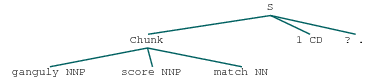

In [105]:
classifier = naive_bayes_classifier.classify(feature_extractor(a))

tagged = brill_tagger.tag(a)
chunkGram = r"""Chunk:{<NN.?>*<NNP.?>*}"""
chunkParser = nltk.RegexpParser(chunkGram)
chunked = chunkParser.parse(tagged)
chunked

In [106]:
team_list = matches.team1.unique()
classifier

'runs'

In [107]:
chunked_words = []
for node in chunked:
    if hasattr(node, "label"):
        words = [word for word, tag in node.leaves()]
        chunked_words += words
        
chunked_words

['ganguly', 'score', 'match']

In [108]:
#Returns full Player name -

def function_return_fullName(chunked_words):
    batsman_list = list(deliveries.batsman.unique())
    bowler_list = list(deliveries.bowler.unique())
    fielder_list = list(deliveries.fielder.unique())
    temp = {'player':[],'team':[]}
    teams_abbr = [ ('Kolkata Knight Riders', 'kolkata knight riders', 'kolkata', 'kolkata riders', 'kolkata rider', 'kolkata knights', 'kolkata knight', 'knight riders', 'knight rider', 'riders', 'k k riders', 'k knight riders', 'kkr'), 
               ('Chennai Super Kings', 'chennai super kings', 'chennai', 'chennai kings', 'chennai super', 'super kings', 'chennai kings', 'csk'),  
               ('Rajasthan Royals', 'rajasthan royals', 'rajasthan', 'rajasthan royal', 'rr'),
               ('Mumbai Indians', 'mumbai indians', 'mumbai', 'mumbai indian', 'indians', 'indian', 'mi'), 
               ('Deccan Chargers', 'deccan chargers', 'deccan', 'deccan charger', 'chargers', 'charger', 'dc'), 
               ('Kings XI Punjab', 'kings xi punjab', 'kings', 'punjab', 'kings XI', 'kings punjab',  'kxip','kp', 'kxp'), 
               ('Royal Challengers Bangalore', 'royal challengers bangalore', 'bangalore', 'royal challengers', 'royal challenger', 'royal bangalore', 'challengers bangalore', 'challenger bangalore', 'rcb', 'rb'),
               ('Delhi Daredevils', 'delhi daredevils', 'delhi', 'daredevils', 'delhi daredevil', 'dd') ]
               
    for data in chunked_words:
        for w in (batsman_list or bowler_list or fielder_list):
            if w.lower() == data.lower():
                temp['player'].append(w)
            elif str(w.split()[len(w.split())-1]).lower() == data.lower():
                temp['player'].append(w)
        for w in teams_abbr:
            if data.lower() in w:
                temp['team'].append(w[0])         

    return temp

In [109]:
chunked_dict = function_return_fullName(chunked_words)
chunked_dict

{'player': ['SC Ganguly'], 'team': []}

In [110]:
if classifier == 'runs':
    try:
        if chunked_dict['team'] != []:
            team_name = chunked_dict['team'][0]
            for i in range(len(chunked)): 
                if chunked[i][1] == 'CD':
                    match_id = chunked[i][0]
            print(total_runs_team_match(team_name,int(match_id)))
        else :
            for i in range(len(chunked)): 
                person_name = chunked_dict['player'][0]
                if chunked[i][1] == 'CD':
                    match_id = chunked[i][0]
            print(runs_batsman_match(person_name,int(match_id)))
    except:
        print("I am a chatbot not your servant. Go and find yourself :D")
        
elif classifier =='max_runs':
    try:
        if chunked_dict['team'] != []:
            team_name = chunked_dict['team'][0]
            for i in range(len(chunked)): 
                if chunked[i][1] == 'CD':
                    match_id = chunked[i][0]
            print(max_score_batsman_match_inTeam(int(match_id), team_name))
        else:
            for i in range(len(chunked)): 
                if chunked[i][1] == 'CD':
                    match_id = chunked[i][0]
            print(max_score_batsman_match(int(match_id)))
    except:
        print("Write something I don't want to be alone")
        
elif classifier =='min_runs':
    try:
        if chunked_dict['team'] != []:
            team_name = chunked_dict['team'][0]
            for i in range(len(chunked)): 
                if chunked[i][1] == 'CD':
                    match_id = chunked[i][0]
            print(min_score_batsman_match_inTeam(int(match_id), team_name))
        else:
            for i in range(len(chunked)): 
                if chunked[i][1] == 'CD':
                    match_id = chunked[i][0]
            print(min_score_batsman_match(int(match_id)))
    except:
        print("min_runs")
        
elif classifier == 'total_runs':
    try:
        if chunked_dict['team'] != []:
            team_name = chunked_dict['team'][0]
            print(total_runs_team_IPL(team_name))
        else :
            for i in range(len(chunked)): 
                person_name = chunked_dict['player'][0]
            print(total_runs_batsman_IPL(person_name))
    except:
        print("total_runs")
        
if classifier == 'fours':
    try:
        if chunked_dict['team'] != []:
            team_name = chunked_dict['team'][0]
            for i in range(len(chunked)): 
                if type(chunked[i]) is tuple:
                    if chunked[i][1] == 'CD':
                        flag = 0
                        for p in boundary_list:
                            if chunked[i][1] == p:
                                flag = 1
                        if flag == 0:
                            match_id = chunked[i][0]
            print(team_fours(int(match_id), team_name))
        else:
            person_name = chunked_dict['player'][0]
            for i in range(len(chunked)): 
                if type(chunked[i]) is tuple:
                    if chunked[i][1] == 'CD':
                        flag = 0
                        for p in boundary_list:
                            if chunked[i][1] == p:
                                flag = 1
                        if flag == 0:
                            match_id = chunked[i][0]    
            print(b_4_batsman_match(person_name ,int(match_id)))
    except:
        print("Fours")

if classifier == 'sixes':
    try:
        if chunked_dict['team'] != []:
            team_name = chunked_dict['team'][0]
            for i in range(len(chunked)): 
                if type(chunked[i]) is tuple:
                    if chunked[i][1] == 'CD':
                        flag = 0
                        for p in boundary_list:
                            if chunked[i][1] == p:
                                flag = 1
                        if flag == 0:
                            match_id = chunked[i][0]
            print(team_sixes(int(match_id), team_name))
        else:
            person_name = chunked_dict['player'][0]
            for i in range(len(chunked)): 
                if type(chunked[i]) is tuple:
                    if chunked[i][1] == 'CD':
                        flag = 0
                        for p in boundary_list:
                            if chunked[i][1] == p:
                                flag = 1
                        if flag == 0:
                            match_id = chunked[i][0]    
            print(b_6_batsman_match(person_name ,int(match_id)))
    except:
        print("SIXES")

10
